<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: **NADIPELLI RUCHITHA**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**


**ASS_7.Logistic Regression**

Step 1: Data Exploration (EDA) Load the dataset and check its structure python Copy Edit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_curve, roc_auc_score

In [ ]:
df_train = pd.read_csv('/content/Titanic_train.csv')
df_test = pd.read_csv('/content/Titanic_test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Examining the features.
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


"Sex" and "Embarked" are categorical columns and the rest are numerical columns.

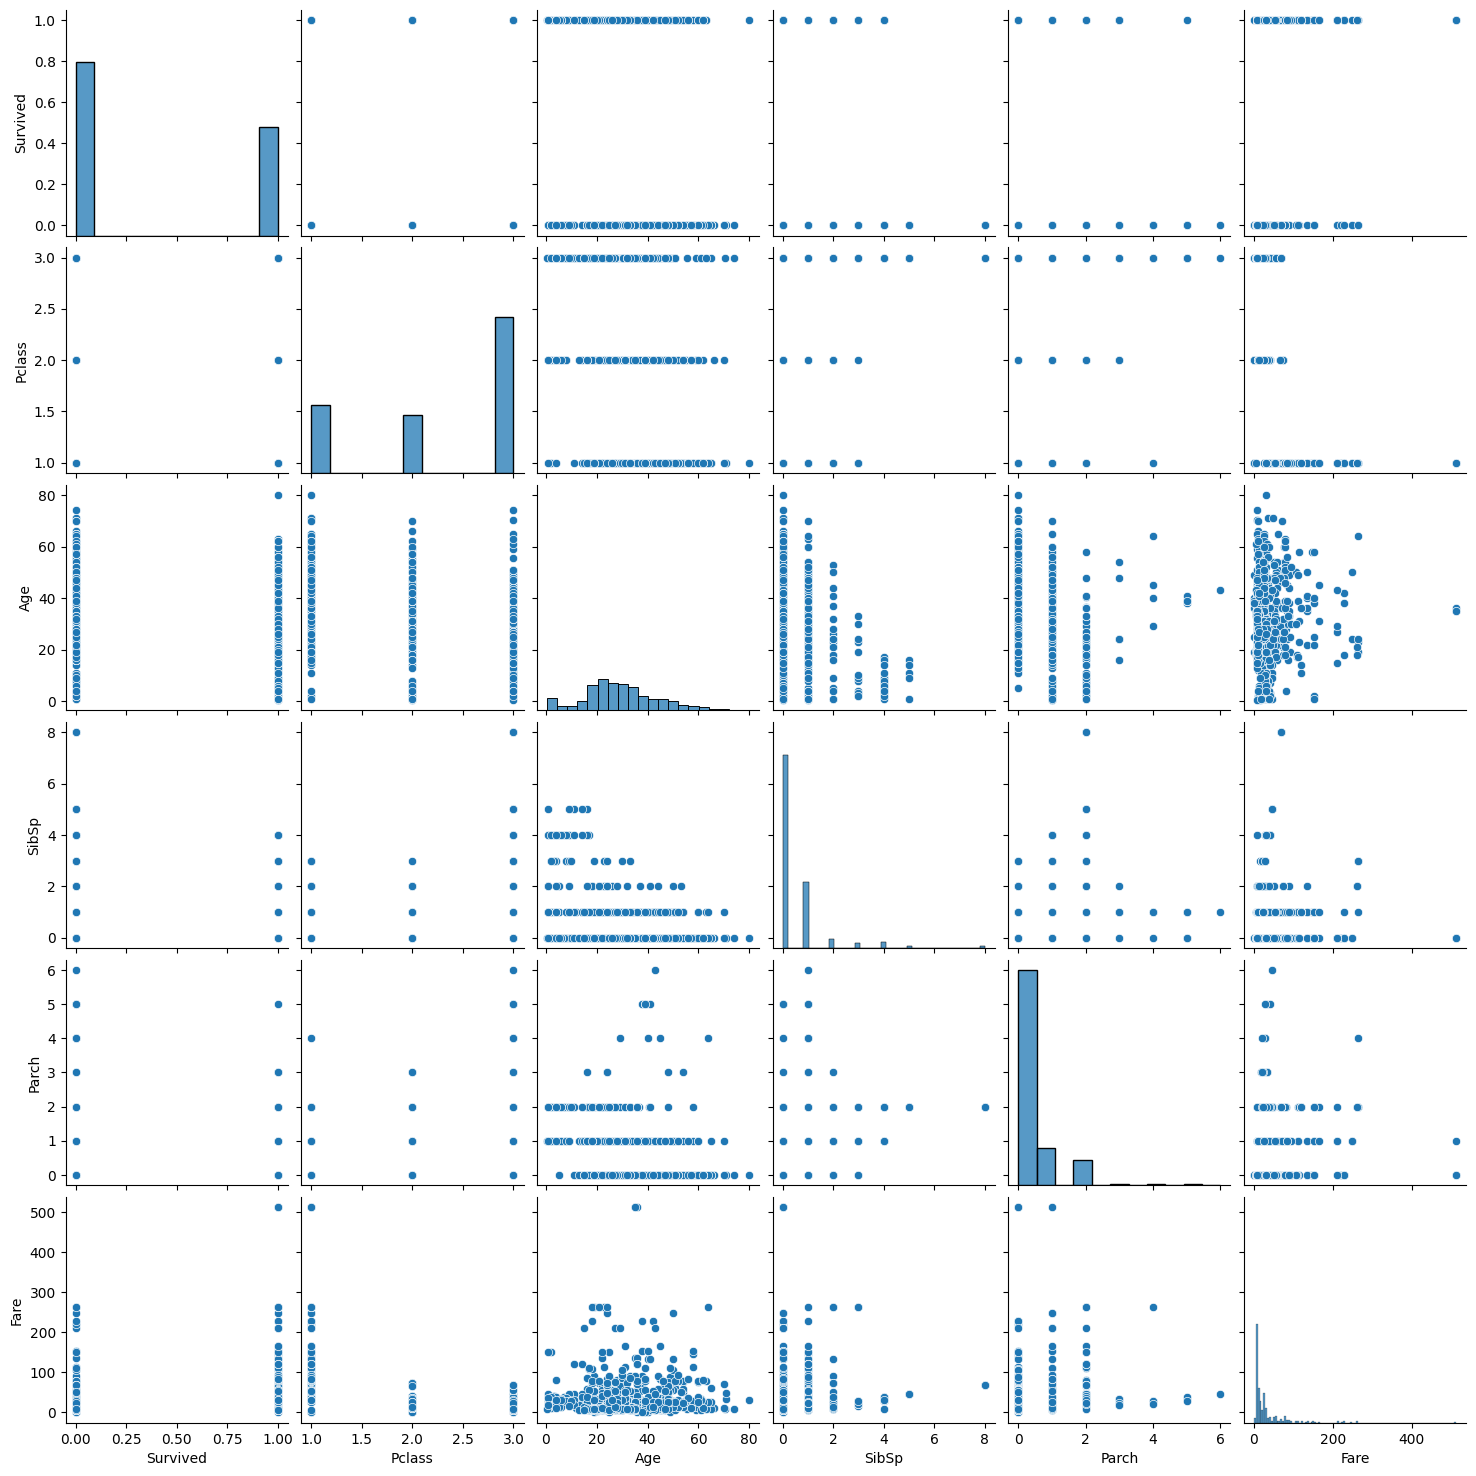

In [ ]:
sns.pairplot(df_train)
plt.show()

In [ ]:
## Handling missing values:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
# fill null values with Mode:
df_train['Age'].fillna(st.mode(df_train['Age']), inplace=True)# fill null values with Mode:
df_train['Age'].fillna(st.mode(df_train['Age']), inplace=True)

<ipython-input-56-dd09bcc716b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(st.mode(df_train['Age']), inplace=True)# fill null values with Mode:
<ipython-input-56-dd09bcc716b9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [ ]:
df_test['Age'].fillna(st.mode(df_test['Age']), inplace=True)

<ipython-input-57-2278cd18a92c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(st.mode(df_test['Age']), inplace=True)


In [ ]:
df_train['Embarked'].fillna(st.mode(df_train['Embarked']), inplace=True)
df_test['Fare'].fillna(st.mode(df_test['Fare']), inplace=True)

<ipython-input-58-f3a4e7191ed2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(st.mode(df_train['Embarked']), inplace=True)
<ipython-input-58-f3a4e7191ed2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
lb = LabelEncoder()

In [ ]:
np.unique(df_test['Sex'])

array(['female', 'male'], dtype=object)

In [ ]:
arr = lb.fit_transform(df_train[['Sex']])
# converted value of female to 0 and male to 1.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df_train['Sex'] = arr

In [ ]:
arr1 = arr = lb.fit_transform(df_test[['Sex']])
df_test['Sex'] = arr1

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
np.unique(df_test['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [ ]:
arr2 = lb.fit_transform(df_train[['Embarked']]) # ['C', 'Q', 'S'] converted to [0, 1, 2]
df_train['Embarked'] = arr2

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
arr3 = lb.fit_transform(df_test[['Embarked']])
df_test['Embarked'] = arr3

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## spliting data:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
features = df_train.drop('Survived', axis=1)
target = df_train['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# predicting the test data
lr.predict(df_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
# Evaluating the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score
accuracy_score(y_test,y_pred)*100

79.82062780269058

In [ ]:
precision_score(y_test,y_pred)*100

81.57894736842105

In [ ]:
recall_score(y_test,y_pred)*100

66.66666666666666

In [ ]:
f1_score(y_test,y_pred)*100

73.37278106508876

In [ ]:
auc_score = roc_auc_score(y_test,y_pred)*100
auc_score

np.float64(77.94871794871794)

In [ ]:
sigma = lr.predict_proba(x_test)[:,1]
sigma

array([0.04540086, 0.66063843, 0.12825211, 0.0948524 , 0.6606948 ,
       0.10475699, 0.1072276 , 0.04554653, 0.04733379, 0.12586648,
       0.72940269, 0.72851001, 0.07169413, 0.05373304, 0.43834461,
       0.23493871, 0.31751818, 0.15491615, 0.84451308, 0.36969413,
       0.12441374, 0.05381359, 0.38045382, 0.32493802, 0.12441374,
       0.78591144, 0.04880644, 0.80146914, 0.12441374, 0.92137799,
       0.72806748, 0.73674926, 0.04754899, 0.12456399, 0.06913997,
       0.08012229, 0.21900182, 0.57295476, 0.66065479, 0.6926784 ,
       0.12441374, 0.09662315, 0.56391695, 0.78001106, 0.11680476,
       0.49996496, 0.94224521, 0.07312025, 0.02794526, 0.51843401,
       0.12371597, 0.1833868 , 0.1745484 , 0.56266979, 0.04936219,
       0.27807642, 0.32009555, 0.06913997, 0.38569505, 0.18040147,
       0.09621196, 0.58502749, 0.08871245, 0.10901185, 0.62471438,
       0.10341907, 0.87539093, 0.07336407, 0.19911165, 0.159325  ,
       0.11510021, 0.73802364, 0.94152827, 0.09621196, 0.60272

In [ ]:
# fpr and tpr values with respect to threshold values for visualising roc curves'
# fpr = false positive rate and tpr = true positive rate.
fpr, tpr, threshold = roc_curve(y_test,sigma)
print(fpr,tpr,threshold)

[0.         0.         0.         0.00769231 0.00769231 0.03076923
 0.03076923 0.03846154 0.03846154 0.04615385 0.04615385 0.04615385
 0.04615385 0.06153846 0.06153846 0.06923077 0.06923077 0.07692308
 0.07692308 0.08461538 0.08461538 0.1        0.1        0.12307692
 0.12307692 0.14615385 0.14615385 0.16923077 0.16923077 0.17692308
 0.17692308 0.19230769 0.19230769 0.2        0.2        0.21538462
 0.21538462 0.28461538 0.28461538 0.30769231 0.30769231 0.32307692
 0.32307692 0.35384615 0.35384615 0.36153846 0.36153846 0.46153846
 0.46923077 0.47692308 0.47692308 0.49230769 0.53846154 0.55384615
 0.56923077 0.64615385 0.65384615 0.66923077 0.66923077 0.68461538
 0.68461538 0.71538462 0.73076923 0.74615385 0.76923077 0.76923077
 0.79230769 0.79230769 0.80769231 0.80769231 0.84615385 0.84615385
 0.86153846 0.86153846 0.86923077 0.87692308 0.87692308 0.90769231
 0.90769231 0.95384615 0.95384615 0.98461538 1.        ] [0.         0.01075269 0.3655914  0.3655914  0.40860215 0.40860215
 0.47

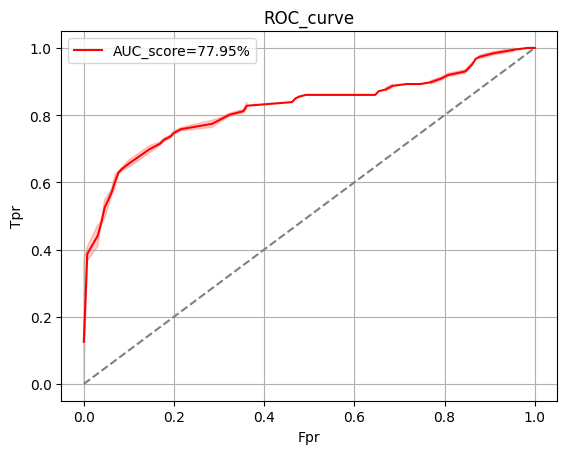

In [ ]:
# visualisation for roc_auc curves:
sns.lineplot(x=fpr, y=tpr, color='r', label=f'AUC_score={auc_score:.2f}%')
plt.plot([0, 1], [0, 1], linestyle='dashed', color='grey')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC_curve')
plt.grid()
plt.legend()
plt.show()

In [ ]:
lr.coef_

array([[-1.07897720e+00, -2.61742165e+00, -4.01210065e-02,
        -3.19578671e-01,  2.92154273e-02,  1.94628193e-03,
        -2.89043874e-01]])

In [ ]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
## Input from user:
def user_inp():
    pclass = st.sidebar.selectbox('Passenger class : 1st=1, 2nd=2, 3rd=3', [1, 2, 3])
    sex = st.sidebar.selectbox('Gender : male=1, female=0', [0, 1])
    age = st.sidebar.number_input('Enter age :')
    sibsp = st.sidebar.selectbox('How many siblings & spouses of the passenger aboard:', [0, 1, 2, 3, 4, 5, 6, 7, 8])
    parch = st.sidebar.selectbox('Number of parents or children a passenger was traveling with:', [0, 1, 2, 3, 4, 5, 6])
    fare = st.sidebar.number_input('Enter fare :')
    embarked = st.sidebar.selectbox('Port of embarkation : Cherbourg=0, Queenstown=1, Southampton=2', [0, 1, 2])
    data = {'Pclass':pclass, 'Sex':sex, 'Age':age, 'SibSp':sibsp, 'Parch':parch, 'Fare':fare, 'Embarked':embarked}
    features = pd.DataFrame(data, index=[0])
    return features

In [ ]:
!pip install streamlit
import streamlit as st # Import streamlit and alias it as 'st'
import pandas as pd

In [ ]:
df = user_inp()

2025-04-24 10:48:47.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:48:47.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:48:47.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:48:47.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:48:47.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:48:47.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:48:47.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:48:47.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://172.28.0.12:8503
  External URL: http://35.185.92.170:8503

  Stopping...
^C


In [ ]:
# Step 1: Install pyngrok if not already installed
!pip install pyngrok --quiet

# Step 2: Import and authenticate ngrok
from pyngrok import ngrok
ngrok.set_auth_token("2wAkD0Hpfxlra96KfCVKvPlKITU_4sfnd2xSCeqaeGH7fS9Q4")

# Step 3: Write your Streamlit app to a file (replace this with your actual app code)
app_code = '''
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

st.title("Logistic Regression App")

uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("Dataset Preview:", df.head())

    if df.shape[1] > 1:
        target = st.selectbox("Select Target Variable", df.columns)
        features = st.multiselect("Select Feature Columns", [col for col in df.columns if col != target])

        if st.button("Train Model") and features:
            X = df[features]
            y = df[target]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model = LogisticRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            st.text("Classification Report:")
            st.text(classification_report(y_test, y_pred))
        elif not features:
            st.warning("Please select at least one feature column.")
'''

with open("logistic_app.py", "w") as f:
    f.write(app_code)

# Step 4: Start Streamlit app in background
import os
os.system('streamlit run logistic_app.py &')

# Step 5: Wait a bit and then expose via ngrok
import time
time.sleep(5)  # wait for Streamlit to initialize

public_url = ngrok.connect(8501)
print("✅ Your Streamlit app is live at: https://0ce1-35-238-60-137.ngrok-free.app/")


✅ Your Streamlit app is live at: https://0ce1-35-238-60-137.ngrok-free.app/


Precision :
 out of all instances the model predicted as positive, how many are actually positive.


















Recall :
 out of all the actual positive instances, how many were correctly identified by the model.

Cross validation :
 splitting the dataset into multiple subsets and then training and validating the model across these different subsets.
importance:













1.Balances Class Representation








2.Reduces Overfitting






3.Reliable Performance Metrics.